In [8]:
# estimating the ratio values from the measurement files
from csv import reader, writer
new_file = []
# source
with open("mes_avg.csv", 'r', newline= '') as f:
    mes = reader(f)
    for line in mes:
        tit = line[0]; part1 = line[1:3]; part2 = line[3:]

        # face height vs width
        r1 = float(part1[0])/float(part1[1])
        # hairline-nose to nose-chin
        r2 = float(part2[0])/float(part2[1])
        
        new_file.append([tit, r1, r2])

# dest
with open("ratio_avg.csv", "w", newline= '') as outf:
    writ = writer(outf)  
    writ.writerows(new_file)

In [65]:
# reading the ratio estimations and storing the values for further anal
from csv import reader
import numpy as np

# r1 = h2w; r2 = hl-nose2nose-chin
ratio1 = []; ratio2 = []

with open("ratio_avg_f.csv", "r", newline= '') as inf:
    dat = reader(inf)
    index = 0; y_val = 1;
    temp1 = np.empty(0,); temp2 = np.empty(0,) 
    for element in dat:
        if index == 6:
            ratio1.append(temp1); ratio2.append(temp2)
            temp1 = np.empty(0,); temp2 = np.empty(0,)
            index = 0; y_val += 1
        temp1 = np.append(temp1, float(element[1]))
        temp2 = np.append(temp2, float(element[2]))
        index += 1
        if y_val == 6:
            ratio1.append(temp1); ratio2.append(temp2)

In [67]:
def normal(x, mu, sig):
    return np.exp(-(x-mu)**2/(2*sig**2))/(sig*(2*np.pi)**0.5)

1.4102 0.0063 0.0533

1.4633 0.0032 0.0191

1.4623 0.0010 0.0057

1.4515 0.0010 0.0068

1.4624 0.0002 0.0015



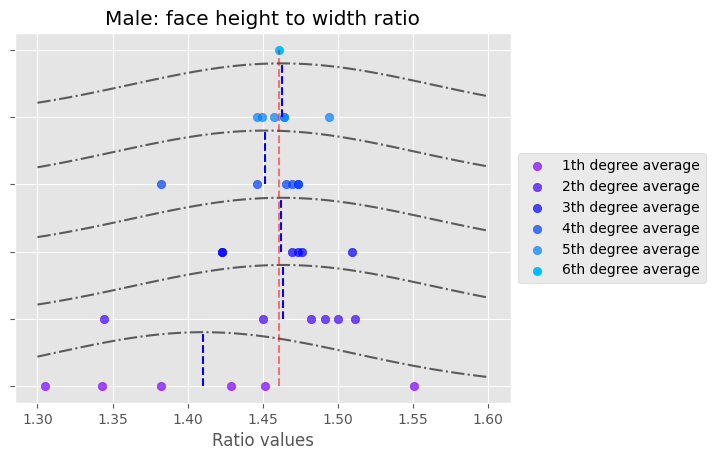

In [62]:
# plotting ratio 1 related estimates
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
colors = ["#8000ff", "#4000ff", "#0000ff", "#0040ff", "#0080ff", "#00bfff"]

y_val = 1
y_ticks = [y_val]
avg_6 = ratio1[-1][0]

for i in range(len(ratio1)-1):
    temp = ratio1[i]
    # mu = mean
    # sig = std dev
    # amp = amplitude of the bell
    # dev = mean squared deviation from avg_6 (row 9)
    mu = np.mean(temp); sig = 0.1; amp = normal(mu, mu, sig)
    dev = np.sum((temp - avg_6*np.ones_like(temp))**2)
    print("%.4f %.4f %.4f\n"%(mu, np.var(temp), dev))
    x = np.linspace(1.3, 1.6, 100)
    y = y_val + normal(x, mu, sig)

    # data points
    label = str(i+1)+"th degree average"
    plt.scatter(temp, y_val*np.ones_like(temp), color = colors[i], label = label, alpha = 0.7)

    # the normal distribution with mean mu, std dev sig
    plt.plot(x, y, 'k-.', alpha = 0.6)
    plt.plot([mu, mu], [y_val, y_val+amp], 'b--')
    y_val+=(amp + 1)
    y_ticks.append(y_val)

plt.scatter(avg_6, y_val, color = colors[-1], label = "6th degree average")
plt.plot([avg_6, avg_6], [y_ticks[0], y_ticks[-1]], 'r--', alpha = 0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# title to be customized F<->M
plt.title("Male: face height to width ratio")

plt.yticks(y_ticks, labels = [])
plt.xlabel("Ratio values")
plt.show()

## Face height to width
### Female
Mean    Var    Dev

1.5171 0.0069 0.0474

1.5159 0.0038 0.0286

1.5048 0.0021 0.0147

1.4971 0.0015 0.0100

1.5017 0.0006 0.0055

### Male
Mean    Var    Dev

1.4102 0.0063 0.0533

1.4633 0.0032 0.0191

1.4623 0.0010 0.0057

1.4515 0.0010 0.0068

1.4624 0.0002 0.0015

1.9164 0.0308 0.1930

1.9202 0.0162 0.1034

1.9213 0.0047 0.0341

1.9226 0.0065 0.0444

1.9079 0.0022 0.0253



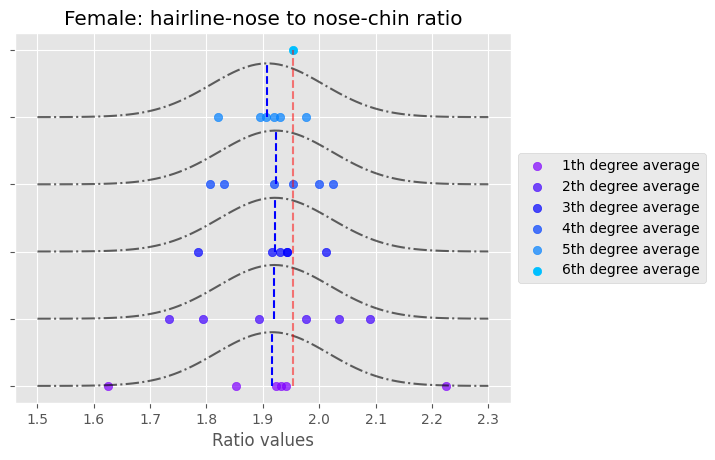

In [66]:
# plotting ratio 1 related estimates
# rest same as the earlier segment
y_val = 1
y_ticks = [y_val]
avg_6 = ratio2[-1][0]

for i in range(len(ratio2)-1):
    temp = ratio2[i]
    mu = np.mean(temp); sig = 0.1; amp = normal(mu, mu, sig)
    dev = np.sum((temp - avg_6*np.ones_like(temp))**2)
    print("%.4f %.4f %.4f\n"%(mu, np.var(temp), dev))
    x = np.linspace(1.5, 2.3, 100)
    y = y_val + normal(x, mu, sig)

    label = str(i+1)+"th degree average"
    plt.scatter(temp, y_val*np.ones_like(temp), color = colors[i], label = label, alpha = 0.7)

    plt.plot(x, y, 'k-.', alpha = 0.6)
    plt.plot([mu, mu], [y_val, y_val+amp], 'b--')
    y_val+=(amp + 1)
    y_ticks.append(y_val)

plt.scatter(avg_6, y_val, color = colors[-1], label = "6th degree average")
plt.plot([avg_6, avg_6], [y_ticks[0], y_ticks[-1]], 'r--', alpha = 0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Female: hairline-nose to nose-chin ratio")

plt.yticks(y_ticks, labels = [])
plt.xlabel("Ratio values")
plt.show()

## Hairline-nose tip to nose tip-chin ratio
### Female
Mean Var Dev

1.9164 0.0308 0.1930

1.9202 0.0162 0.1034

1.9213 0.0047 0.0341

1.9226 0.0065 0.0444

1.9079 0.0022 0.0253

### Male
Mean Var Dev

1.7452 0.0243 0.1541

1.7020 0.0041 0.0247

1.6517 0.0066 0.0586

1.6558 0.0012 0.0238

1.6950 0.0016 0.0107